In [40]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [41]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [42]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [43]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

51.5284043171867 114.83538136627652
-64.21485485003356 -59.63554023055329
-25.966142778699904 -167.97874144537388
-46.436432424261156 -29.261886043973874
-18.271034724200746 143.81490816822696
-72.13457776093492 14.648106899243743
-14.370322928291642 -87.86632578232313
-67.28281372313049 -112.68100895581168
52.16423179004582 -123.83386696111799
-41.562110467109875 169.2670540230759
-41.81499950432981 92.74817540037083
-80.27999530524139 -39.34279127110045
77.69493465786451 -153.98606659464969
-23.89477043547751 -55.37577376467743
86.45831590804244 -127.18882569755084
-44.34013478533305 75.31529138613058
61.16868775795095 139.61994308123258
88.80611453062167 -5.840731981595951
-47.15060970075178 -41.12176376918441
30.969417310455725 -118.28997759918784
0.6057256345418978 -119.92044875182455
35.23851458860966 -3.4718893203509253
-87.67911020972896 38.699449121919116
63.259926240028705 -67.36570705992924
77.23990369788527 -161.41234387642146
-88.03632681021955 -162.20941767960187
24.72803

75.15476123129591 45.16749096742009
10.704205127177389 80.6769971843521
58.87027485121905 -134.38294053042281
-15.342499256620798 72.25156560613962
77.11835469334471 -114.35843919288253
64.50093539689891 -38.19548370976062
-87.5475416530772 114.30737691940737
-4.236782571002607 96.4228088879608
27.158428634935888 40.48282019262652
2.9427240463974442 -102.07759809274371
9.44221427800828 133.0676916826049
-24.248216834290403 -160.90467359904713
-39.23293443449233 -145.26285213261244
-14.461676594838067 -94.23739798284794
-73.64238904031356 -171.15749835396795
0.22814204155906737 167.47483697309417
87.02466760925518 -4.95575960182606
-74.70147023693286 127.64231927889358
30.5298919726755 -86.62317213200491
21.50953036422544 133.2873045138855
-2.3214181825010485 89.14204230867472
-88.94128563424525 -24.683153864431944
-29.748991101000932 -80.68616559162086
-51.335859460390154 49.1045722706136
86.10819866215098 -95.42257064887518
-59.54321233158183 33.29882333954919
-87.82526695025228 -12.2

In [44]:
from citipy import citipy

In [45]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [46]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [47]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bdf9e6e124449e6fab6869b2d4cf7778


In [48]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bdf9e6e124449e6fab6869b2d4cf7778&q=Boston


In [49]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [50]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01d"}],"base":"stations","main":{"temp":90.37,"feels_like":94.39,"temp_min":87.17,"temp_max":93.45,"pressure":1003,"humidity":48},"visibility":10000,"wind":{"speed":8.99,"deg":321,"gust":25.01},"clouds":{"all":9},"dt":1658253249,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1658222643,"sunset":1658276198},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [51]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 90.37,
  'feels_like': 94.39,
  'temp_min': 87.17,
  'temp_max': 93.45,
  'pressure': 1003,
  'humidity': 48},
 'visibility': 10000,
 'wind': {'speed': 8.99, 'deg': 321, 'gust': 25.01},
 'clouds': {'all': 9},
 'dt': 1658253249,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1658222643,
  'sunset': 1658276198},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [52]:
# Get the JSON data.
boston_data = city_weather.json()

In [53]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 93.45 48 9 8.99


In [54]:
# Loop through city Lists 
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 
    if (i % 50 == 0 and i >= 50):
        set_count += 1 
        record_count = 1 
    
    # Create URL for each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log URL, set, and record numbers for each city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1

# Make an API request for each city 
    try:
       
        # Parse the JSON data
        city_weather = requests.get(city_url).json()

        # Compile needed data
        city_city = city.title()
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_hum = city_weather['main']['humidity']
        city_cloud = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']

        # Fill City Data list 
        city_data.append({"City": city_city,
                         "Country": city_country,
                         "Date": city_date,
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_hum,
                         "Cloudiness": city_cloud,
                         "Wind Speed": city_wind,
                         })
    #If an error occurs
    except: 
        print("City not found. Skipping")
        pass

    # Complete Data Retrieval    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 6 of Set 26 | urulga
City not found. Skipping
Processing Record 7 of Set 26 | ushuaia
Processing Record 8 of Set 26 | alofi
Processing Record 9 of Set 26 | cidreira
Processing Record 10 of Set 26 | atherton
Processing Record 11 of Set 26 | bredasdorp
Processing Record 12 of Set 26 | huarmey
Processing Record 13 of Set 26 | punta arenas
Processing Record 14 of Set 26 | quesnel
Processing Record 15 of Set 26 | hokitika
Processing Record 16 of Set 26 | busselton
Processing Record 17 of Set 26 | barrow
Processing Record 18 of Set 26 | paranhos
Processing Record 19 of Set 26 | tuktoyaktuk
Processing Record 20 of Set 26 | mahebourg
Processing Record 21 of Set 26 | solnechnyy
Processing Record 22 of Set 26 | barentsburg
City not found. Skipping
Processing Record 23 of Set 26 | chuy
Processing Record 24 of Set 26 | rosarito
Processing Record 25 of Set 26 | atuona
Processing Record 26 of Set 26 | melilla
Processing Record 27 of Set 26 | port elizabeth
Processing Record 28 of S

Processing Record 35 of Set 29 | baruun-urt
Processing Record 36 of Set 29 | nemuro
Processing Record 37 of Set 29 | samusu
City not found. Skipping
Processing Record 38 of Set 29 | avera
Processing Record 39 of Set 29 | tautira
Processing Record 40 of Set 29 | tyrma
Processing Record 41 of Set 29 | sorkjosen
Processing Record 42 of Set 29 | kaitangata
Processing Record 43 of Set 29 | butaritari
Processing Record 44 of Set 29 | randfontein
Processing Record 45 of Set 29 | puerto ayora
Processing Record 46 of Set 29 | katherine
Processing Record 47 of Set 29 | gat
Processing Record 48 of Set 29 | port hedland
Processing Record 49 of Set 29 | katsuura
Processing Record 50 of Set 29 | hovd
Processing Record 1 of Set 30 | hamilton
Processing Record 2 of Set 30 | kotka
Processing Record 3 of Set 30 | petropavlovsk-kamchatskiy
Processing Record 4 of Set 30 | dikson
Processing Record 5 of Set 30 | giddalur
Processing Record 6 of Set 30 | vestmannaeyjar
Processing Record 7 of Set 30 | pangnirt

Processing Record 19 of Set 33 | tessalit
Processing Record 20 of Set 33 | bulgan
Processing Record 21 of Set 33 | mantua
Processing Record 22 of Set 33 | mundo nuevo
Processing Record 23 of Set 33 | vastseliina
Processing Record 24 of Set 33 | lompoc
Processing Record 25 of Set 33 | yeletskiy
City not found. Skipping
Processing Record 26 of Set 33 | srisailam
Processing Record 27 of Set 33 | pudozh
Processing Record 28 of Set 33 | pinawa
Processing Record 29 of Set 33 | uglovskoye
Processing Record 30 of Set 33 | half moon bay
Processing Record 31 of Set 33 | chernigovka
Processing Record 32 of Set 33 | tostedt
Processing Record 33 of Set 33 | sola
Processing Record 34 of Set 33 | walvis bay
Processing Record 35 of Set 33 | russell
Processing Record 36 of Set 33 | okha
Processing Record 37 of Set 33 | ancud
Processing Record 38 of Set 33 | saint marys
Processing Record 39 of Set 33 | kamenskoye
City not found. Skipping
Processing Record 40 of Set 33 | lazi
Processing Record 41 of Set 

Processing Record 6 of Set 37 | ugoofaaru
Processing Record 7 of Set 37 | moree
Processing Record 8 of Set 37 | havelock
Processing Record 9 of Set 37 | zima
Processing Record 10 of Set 37 | lewiston
Processing Record 11 of Set 37 | talcahuano
Processing Record 12 of Set 37 | bingol
Processing Record 13 of Set 37 | kousseri
Processing Record 14 of Set 37 | erzin
Processing Record 15 of Set 37 | bone
Processing Record 16 of Set 37 | anar darreh
City not found. Skipping
Processing Record 17 of Set 37 | gigmoto
Processing Record 18 of Set 37 | borjomi
Processing Record 19 of Set 37 | syracuse
Processing Record 20 of Set 37 | nagapattinam
Processing Record 21 of Set 37 | sakakah
Processing Record 22 of Set 37 | meyungs
City not found. Skipping
Processing Record 23 of Set 37 | bairiki
Processing Record 24 of Set 37 | wright
Processing Record 25 of Set 37 | nishihara
Processing Record 26 of Set 37 | narva-joesuu
Processing Record 27 of Set 37 | astana
Processing Record 28 of Set 37 | dovolno

In [55]:
# 6.2.7

# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-07-19 17:52:42,-54.8000,-68.3000,42.46,61,40,4.61
1,Alofi,NU,2022-07-19 17:55:34,-19.0595,-169.9187,73.29,83,27,11.50
2,Cidreira,BR,2022-07-19 17:55:35,-30.1811,-50.2056,61.70,75,78,7.72
3,Atherton,GB,2022-07-19 17:55:35,53.5237,-2.4935,88.70,41,14,7.81
4,Bredasdorp,ZA,2022-07-19 17:55:35,-34.5322,20.0403,48.34,87,72,3.94
5,Huarmey,PE,2022-07-19 17:55:35,-10.0681,-78.1522,68.45,70,96,11.05
6,Punta Arenas,CL,2022-07-19 17:55:35,-53.1500,-70.9167,41.11,81,40,11.50
7,Quesnel,CA,2022-07-19 17:55:35,52.9999,-122.5029,64.90,68,40,0.00
8,Hokitika,NZ,2022-07-19 17:55:35,-42.7167,170.9667,49.35,91,64,4.83
9,Busselton,AU,2022-07-19 17:55:36,-33.6500,115.3333,57.40,77,100,9.37


In [65]:
# Reorder the columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-07-19 17:52:42,-54.8000,-68.3000,42.46,61,40,4.61
1,Alofi,NU,2022-07-19 17:55:34,-19.0595,-169.9187,73.29,83,27,11.50
2,Cidreira,BR,2022-07-19 17:55:35,-30.1811,-50.2056,61.70,75,78,7.72
3,Atherton,GB,2022-07-19 17:55:35,53.5237,-2.4935,88.70,41,14,7.81
4,Bredasdorp,ZA,2022-07-19 17:55:35,-34.5322,20.0403,48.34,87,72,3.94
5,Huarmey,PE,2022-07-19 17:55:35,-10.0681,-78.1522,68.45,70,96,11.05
6,Punta Arenas,CL,2022-07-19 17:55:35,-53.1500,-70.9167,41.11,81,40,11.50
7,Quesnel,CA,2022-07-19 17:55:35,52.9999,-122.5029,64.90,68,40,0.00
8,Hokitika,NZ,2022-07-19 17:55:35,-42.7167,170.9667,49.35,91,64,4.83
9,Busselton,AU,2022-07-19 17:55:36,-33.6500,115.3333,57.40,77,100,9.37


In [57]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [58]:
# STILL 6.2.7

# Need to modify gitignore

In [59]:
# 6.3.1

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

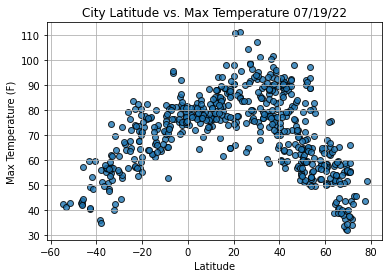

In [60]:
# MAX TEMP x LATITUDE SCATTER PLOT

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

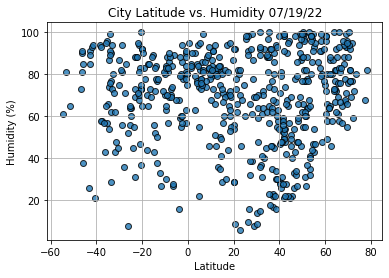

In [61]:
# HUMIDITY x LATITUDE SCATTER PLOT

# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

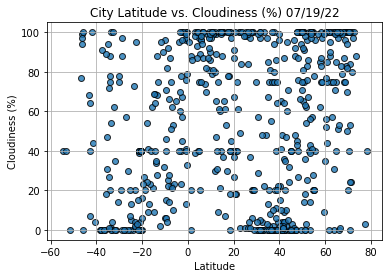

In [62]:
# CLOUDINESS x LATITUDE SCATTER PLOT


# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

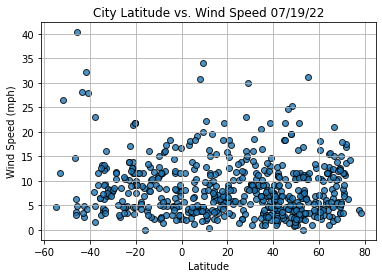

In [63]:
# WIND SPEED x LATITUDE SCATTER PLOT


# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [66]:
# LINEAR REGRESSION

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [69]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

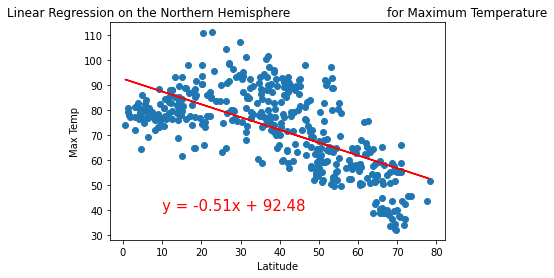

In [70]:
# MAX TEMP Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

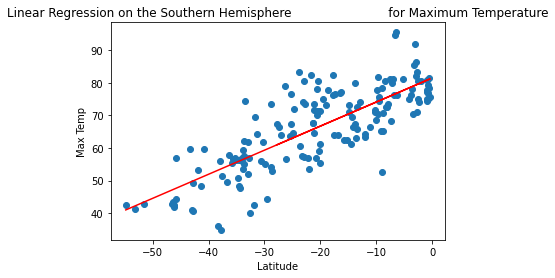

In [71]:
# MAX TEMP Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

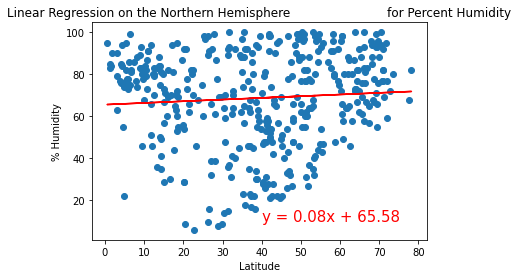

In [72]:
# PERCENT HUMIDITY Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Percent Humidity', '% Humidity',(40,10))

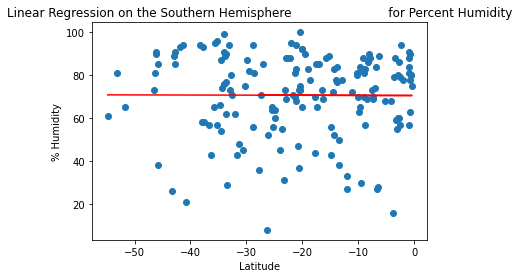

In [73]:
# PERCENT HUMIDITY Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Percent Humidity', '% Humidity',(40,10))

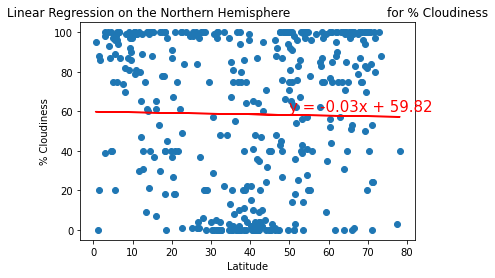

In [75]:
# CLOUDINESS Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(50,60))

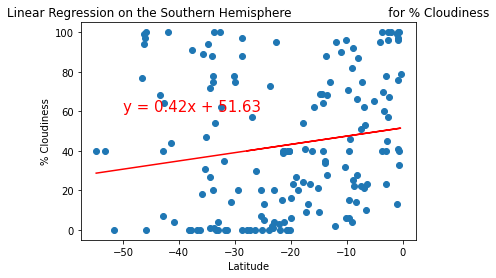

In [74]:
# CLOUDINESS Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

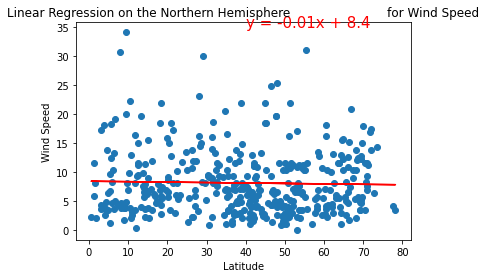

In [76]:
# WIND SPEED Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

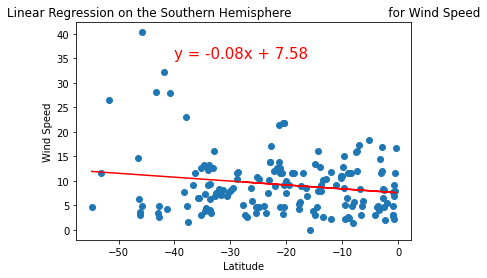

In [77]:
# WIND SPEED Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-40,35))

In [79]:
# 6.5.2

